In [156]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [157]:
import pandas as pd


df_train = pd.read_csv("/content/drive/MyDrive/train_u6lujuX_CVtuZ9i.csv")

In [158]:
df_train.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [159]:
df_train.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [160]:
df_train.isna().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [161]:
df_train.dropna(inplace = True)

In [162]:
df_train.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [163]:
df_train.isna().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


<Axes: >

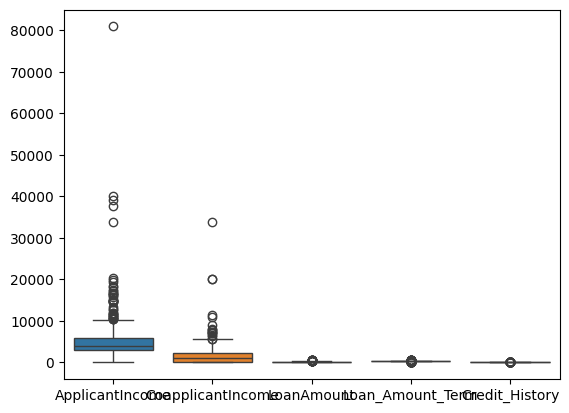

In [164]:
import seaborn as sns

sns.boxplot(df_train)

In [165]:
import pandas as pd

def remove_outliers_iqr(df):
    # select only numeric columns
    numeric_df = df.select_dtypes(include='number')

    Q1 = numeric_df.quantile(0.25)
    Q3 = numeric_df.quantile(0.75)
    IQR = Q3 - Q1

    mask = ~((numeric_df < (Q1 - 1.5 * IQR)) |
             (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)

    return df[mask]

# apply
df_train_clean = remove_outliers_iqr(df_train)

print("Original shape:", df_train.shape)
print("After outlier removal:", df_train_clean.shape)


Original shape: (480, 13)
After outlier removal: (312, 13)


<Axes: >

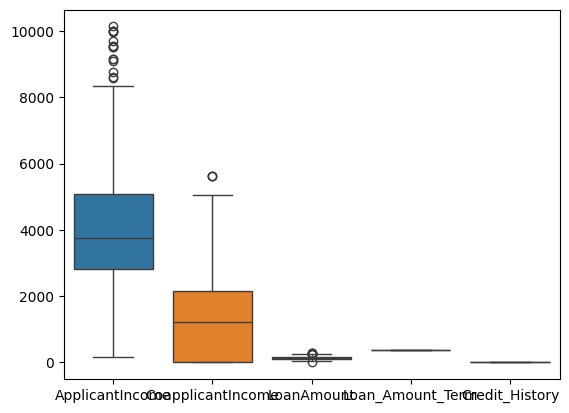

In [166]:

sns.boxplot(df_train_clean)

In [167]:
x = df_train_clean.drop(columns = ['Loan_Status'])
y = df_train_clean['Loan_Status']

In [168]:
from sklearn.preprocessing import LabelEncoder

# Create a dictionary to store LabelEncoders for each categorical column
label_encoders = {}

# Get the list of categorical columns BEFORE transforming 'x' in-place
categorical_cols = x.select_dtypes(include='object').columns.tolist()

for col in categorical_cols:
    le = LabelEncoder()
    x[col] = le.fit_transform(x[col])
    label_encoders[col] = le # Store the fitted encoder

In [169]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

# scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [170]:
#train SVM with linear kernel
from sklearn.svm import SVC

svm_linear = SVC(kernel = 'linear', C=1)
svm_linear.fit(x_train,y_train)
y_pred_linear = svm_linear.predict(x_test)

In [171]:
svm_poly = SVC(kernel='poly', degree=3)
svm_poly.fit(x_train, y_train)
y_pred_poly = svm_poly.predict(x_test)


In [172]:
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(x_train, y_train)
y_pred_rbf = svm_rbf.predict(x_test)


In [173]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def evaluate_model(name, y_test, y_pred):
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

evaluate_model("Linear SVM", y_test, y_pred_linear)
evaluate_model("Polynomial SVM", y_test, y_pred_poly)
evaluate_model("RBF SVM", y_test, y_pred_rbf)



Linear SVM
Accuracy: 0.8571428571428571
Confusion Matrix:
 [[ 0  9]
 [ 0 54]]
Classification Report:
               precision    recall  f1-score   support

           N       0.00      0.00      0.00         9
           Y       0.86      1.00      0.92        54

    accuracy                           0.86        63
   macro avg       0.43      0.50      0.46        63
weighted avg       0.73      0.86      0.79        63


Polynomial SVM
Accuracy: 0.8412698412698413
Confusion Matrix:
 [[ 0  9]
 [ 1 53]]
Classification Report:
               precision    recall  f1-score   support

           N       0.00      0.00      0.00         9
           Y       0.85      0.98      0.91        54

    accuracy                           0.84        63
   macro avg       0.43      0.49      0.46        63
weighted avg       0.73      0.84      0.78        63


RBF SVM
Accuracy: 0.8571428571428571
Confusion Matrix:
 [[ 0  9]
 [ 0 54]]
Classification Report:
               precision    recall  f

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

In [174]:
cm = confusion_matrix(y_test, y_pred_rbf)

TN, FP, FN, TP = cm.ravel()

print("Eligible customers rejected (FN):", FN)
print("Risky customers approved (FP):", FP)


Eligible customers rejected (FN): 0
Risky customers approved (FP): 9


In [175]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)


In [176]:
from sklearn.svm import SVC

y_train_num = y_train.map({'N': 0, 'Y': 1})

# train SVMs
svm_linear = SVC(kernel='linear')
svm_poly = SVC(kernel='poly', degree=3)
svm_rbf = SVC(kernel='rbf')

svm_linear.fit(x_train_pca, y_train_num)
svm_poly.fit(x_train_pca, y_train_num)
svm_rbf.fit(x_train_pca, y_train_num)

SVC()

In [177]:
x_min, x_max = x_train_pca[:, 0].min() - 2, x_train_pca[:, 0].max() + 2
y_min, y_max = x_train_pca[:, 1].min() - 2, x_train_pca[:, 1].max() + 2

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 500),
    np.linspace(y_min, y_max, 500)
)


In [178]:
grid_points = np.c_[xx.ravel(), yy.ravel()]

Z_linear = svm_linear.decision_function(grid_points).reshape(xx.shape)
Z_poly   = svm_poly.decision_function(grid_points).reshape(xx.shape)
Z_rbf    = svm_rbf.decision_function(grid_points).reshape(xx.shape)


In [179]:
y_train_num = y_train.map({'N': 0, 'Y': 1})


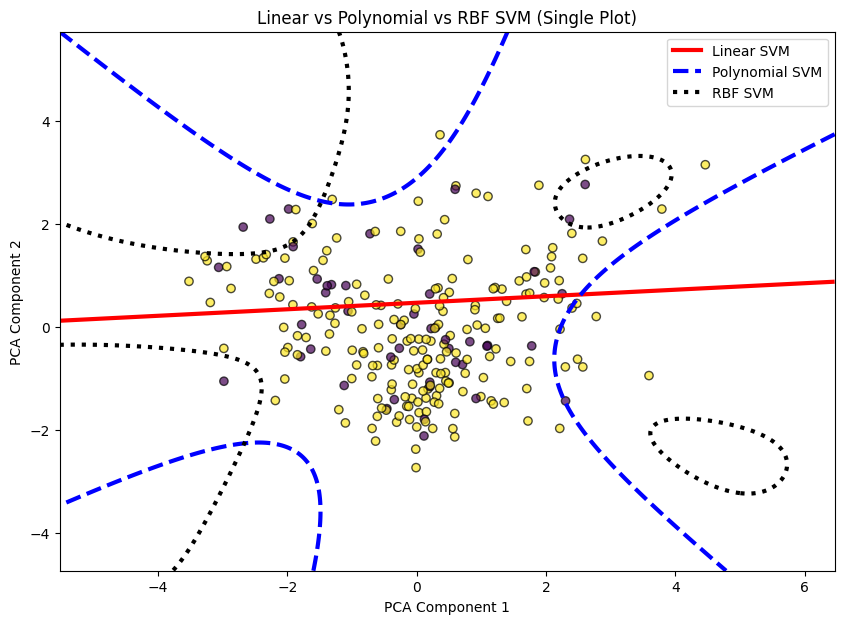

In [180]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))

# plot points FIRST
plt.scatter(
    x_train_pca[:, 0],
    x_train_pca[:, 1],
    c=y_train_num,
    cmap='viridis',
    edgecolor='k',
    alpha=0.7
)

# plot decision boundaries ON TOP
plt.contour(xx, yy, Z_linear,
            levels=[linear_level], colors='red', linewidths=3)

plt.contour(xx, yy, Z_poly,
            levels=[poly_level], colors='blue', linewidths=3, linestyles='dashed')

plt.contour(xx, yy, Z_rbf,
            levels=[rbf_level], colors='black', linewidths=3, linestyles='dotted')

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Linear vs Polynomial vs RBF SVM (Single Plot)")

from matplotlib.lines import Line2D
legend_lines = [
    Line2D([0], [0], color='red', lw=3, label='Linear SVM'),
    Line2D([0], [0], color='blue', lw=3, linestyle='dashed', label='Polynomial SVM'),
    Line2D([0], [0], color='black', lw=3, linestyle='dotted', label='RBF SVM')
]

plt.legend(handles=legend_lines)
plt.show()

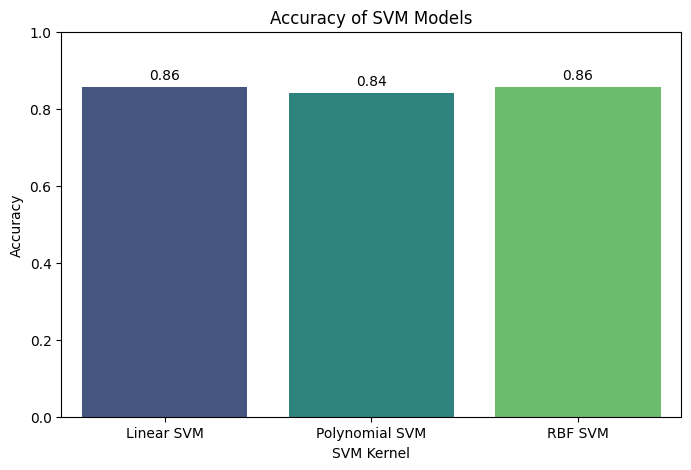

In [181]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract accuracies from the evaluation function output or re-calculate for clarity
linear_accuracy = accuracy_score(y_test, y_pred_linear)
poly_accuracy = accuracy_score(y_test, y_pred_poly)
rbf_accuracy = accuracy_score(y_test, y_pred_rbf)

models = ['Linear SVM', 'Polynomial SVM', 'RBF SVM']
accuracies = [linear_accuracy, poly_accuracy, rbf_accuracy]

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracies, hue=models, palette='viridis', legend=False)
plt.title('Accuracy of SVM Models')
plt.xlabel('SVM Kernel')
plt.ylabel('Accuracy')
plt.ylim(0, 1) # Accuracy ranges from 0 to 1

for index, value in enumerate(accuracies):
    plt.text(index, value + 0.02, f'{value:.2f}', ha='center')

plt.show()

In [182]:
import numpy as np

print(f"Min Z_linear: {np.min(Z_linear):.4f}, Max Z_linear: {np.max(Z_linear):.4f}")
print(f"Min Z_poly: {np.min(Z_poly):.4f}, Max Z_poly: {np.max(Z_poly):.4f}")
print(f"Min Z_rbf: {np.min(Z_rbf):.4f}, Max Z_rbf: {np.max(Z_rbf):.4f}")

# Calculate mean values to use as contour levels for visibility
linear_level = np.mean(Z_linear)
poly_level = np.mean(Z_poly)
rbf_level = np.mean(Z_rbf)

print(f"\nSuggested contour levels (mean of decision function values):")
print(f"Linear SVM level: {linear_level:.4f}")
print(f"Polynomial SVM level: {poly_level:.4f}")
print(f"RBF SVM level: {rbf_level:.4f}")

Min Z_linear: 1.0000, Max Z_linear: 1.0000
Min Z_poly: 0.9986, Max Z_poly: 1.0024
Min Z_rbf: 0.7923, Max Z_rbf: 1.0633

Suggested contour levels (mean of decision function values):
Linear SVM level: 1.0000
Polynomial SVM level: 1.0002
RBF SVM level: 0.9912


The previous attempt to visualize decision boundaries at `levels=[0]` did not work because the SVM models, likely due to the imbalanced nature of the dataset (many more 'Y' class labels than 'N'), consistently predict the 'Y' class. This means their `decision_function` outputs are always positive within the observed feature space, never crossing zero.

To make *some* form of separating lines visible, we will plot contours at the mean `decision_function` value for each model. These lines do not represent the traditional `Z=0` decision boundary, but rather indicate where the model's confidence for the 'Y' class is at an average level, allowing us to visualize the *shape* of the decision function in 2D PCA space.